#Tugas Praktikum 4 Machine Learning
Kamal Ariq<br>
24060121140130<br>
A1 <br>

Import Library

In [9]:
# Import Library yang dibutuhkan
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import scipy
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

#Agglomerative clustering untuk dataset random


Generating Dataset


In [10]:
# Generate Random Data
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

Fungsi `make_blobs` dari library scikit-learn digunakan untuk membuat dataset acak dengan jumlah total titik data yang dapat ditentukan menggunakan parameter `n_samples`. Jumlah kelompok atau pusat yang akan dihasilkan dapat diatur menggunakan parameter `centers`, yang merepresentasikan lokasi pusat-pusat tersebut dalam bentuk array koordinat x dan y.

Parameter `cluster_std` mengontrol penyebaran atau dispersi dari setiap kelompok data. Semakin besar nilai `cluster_std`, semakin besar jarak atau dispersi antara titik-titik data dalam kelompok yang sama. Rentang nilai yang disarankan untuk `cluster_std` adalah antara 0,5 hingga 1,5.

Dengan menggunakan kombinasi parameter-parameter ini, `make_blobs` menghasilkan dataset berupa kumpulan titik data dengan distribusi yang terkendali secara acak.

In [11]:
# Menampilkan dimensi data
X1.shape

(50, 2)

Plotting Random Dataset

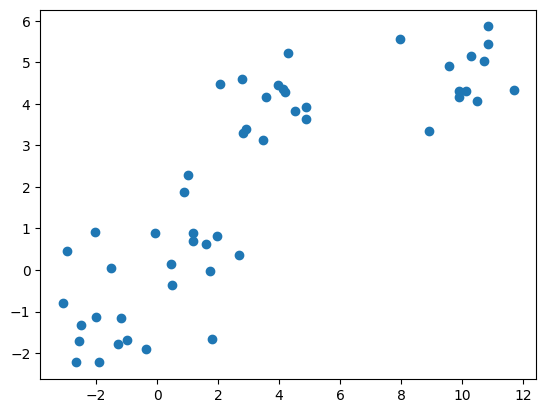

In [12]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o')

Kode tersebut menggunakan Matplotlib untuk membuat visualisasi plot dari random dataset yang telah dibuat sebelumnya. Dalam kode tersebut, fungsi `scatter` dari Matplotlib digunakan untuk menampilkan titik-titik data pada bidang dua dimensi. Koordinat x dan y diambil dari kolom pertama dan kedua dari matriks fitur `X1`. Setiap titik data direpresentasikan oleh simbol lingkaran dengan menggunakan parameter `marker='o'`.

Plot ini memberikan gambaran visual mengenai sebaran data dalam ruang dua dimensi sebelum proses Agglomerative Clustering dilakukan. Dengan visualisasi ini, kita dapat melihat pola atau struktur yang mungkin ada dalam dataset sebelum dilakukan proses pengelompokan menggunakan algoritma Agglomerative Clustering.

##Single Linkage

In [13]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'single')
agglom.fit(X1, y1)

AgglomerativeClustering(linkage='single', n_clusters=4)

Kode tersebut memulai proses inisialisasi dan pelatihan model Agglomerative Clustering menggunakan library scikit-learn. Sebuah objek AgglomerativeClustering dibuat dengan pengaturan 4 klaster dan metode linkage 'single'. Langkah selanjutnya adalah melatih model ini dengan menggunakan dataset (X1 dan y1).

Proses pelatihan bertujuan untuk mengelompokkan data ke dalam klaster berdasarkan pola dan struktur yang ada dalam dataset. Penggunaan metode single-linkage pada model ini akan membentuk klaster berdasarkan jarak minimum antara titik-titik data dalam klaster yang baru terbentuk.

Setelah proses pelatihan selesai, model yang terlatih dapat digunakan untuk menganalisis klaster yang terbentuk pada dataset tersebut. Dengan demikian, model ini memungkinkan untuk melakukan identifikasi terhadap pola atau hubungan yang ada antara titik-titik data yang tergabung dalam klaster yang berbeda.

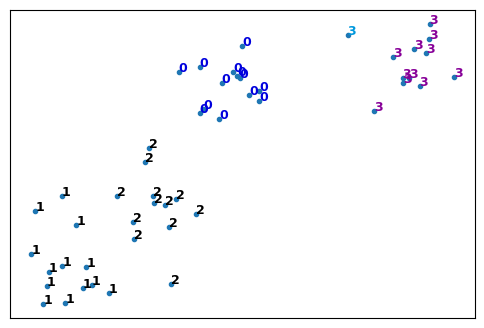

In [14]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})

# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')

# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

Kode tersebut membuat scatter plot dari dataset yang telah dinormalisasi. Setiap titik pada plot diberi warna berdasarkan label klaster yang dihasilkan dari proses Agglomerative Clustering. Normalisasi data dilakukan untuk memastikan nilai-nilai dalam dataset berada dalam rentang antara 0 dan 1. Label kelas (y1) ditampilkan pada setiap titik, sedangkan warna titik-titik tersebut ditentukan oleh label klaster yang dihasilkan oleh model Agglomerative Clustering. Ini memungkinkan visualisasi hubungan antara titik-titik data berdasarkan klaster yang terbentuk.

In [16]:
# Menghitung matriks jarak
dist_matrix = distance_matrix(X1,X1)
# Mencetak hasil matriks
print(dist_matrix)

[[0.         1.09974111 0.79027142 ... 0.78231341 1.03744191 0.14882698]
 [1.09974111 0.         0.31399764 ... 0.38095815 0.1095053  1.11718621]
 [0.79027142 0.31399764 0.         ... 0.2231514  0.27828744 0.80321236]
 ...
 [0.78231341 0.38095815 0.2231514  ... 0.         0.28585987 0.83551624]
 [1.03744191 0.1095053  0.27828744 ... 0.28585987 0.         1.06768338]
 [0.14882698 1.11718621 0.80321236 ... 0.83551624 1.06768338 0.        ]]


In [17]:
# Single Linkage
Z = hierarchy.linkage(dist_matrix, 'single')

<ipython-input-17-4d82e2d71e4f>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'single')


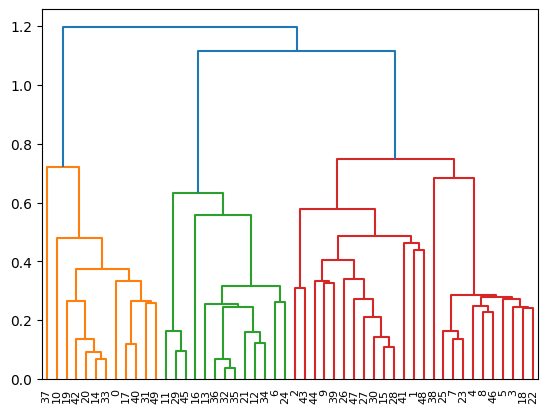

In [18]:
# Menampilkan dendogram
dendro = hierarchy.dendrogram(Z)

Pada kode tersebut melakukan analisis klastering hierarkis dengan metode single linkage menggunakan modul hierarki dari library SciPy dalam bahasa Python. Matriks jarak antar data dibuat dan hierarki klaster dibangun dengan fungsi linkage. Hasilnya disajikan dalam dendrogram menggunakan fungsi dendrogram.

##Average Linkage

In [ ]:
agglom1 = AgglomerativeClustering(n_clusters=4, linkage='average')
agglom1.fit(X1, y1)

Kode diatas menggunakan algoritma Agglomerative clustering dari Scikit-learn dengan jumlah cluster 4 dan menggunakan metode average linkage.

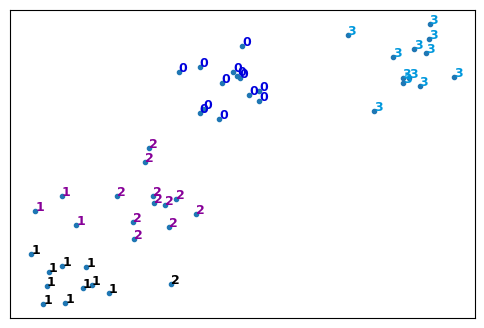

In [20]:
# Create a figure of size 6 by 4.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down
# Or else the data points will be scattered very far apart

# Create a minimum and maximum range of X1
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints
for i in range(X1.shape[0]):
  plt.text(X1[i,0], X1[i,1], str(y1[i]),
           color=plt.cm.nipy_spectral(agglom1.labels_[i] / 10.),
           fontdict={'weight': 'bold', 'size':9})

# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])

# Display the plot of the original data before clustering
plt.scatter(X1[:,0], X1[:, 1], marker='.')
plt.show()

In [21]:
# Menghitung matriks jarak
dist_matrix = distance_matrix(X1,X1)
# Mencetak hasil matriks jarak
print(dist_matrix)

[[0.         1.09974111 0.79027142 ... 0.78231341 1.03744191 0.14882698]
 [1.09974111 0.         0.31399764 ... 0.38095815 0.1095053  1.11718621]
 [0.79027142 0.31399764 0.         ... 0.2231514  0.27828744 0.80321236]
 ...
 [0.78231341 0.38095815 0.2231514  ... 0.         0.28585987 0.83551624]
 [1.03744191 0.1095053  0.27828744 ... 0.28585987 0.         1.06768338]
 [0.14882698 1.11718621 0.80321236 ... 0.83551624 1.06768338 0.        ]]


In [22]:
# Average linkage
Y = hierarchy.linkage(dist_matrix, 'average')

<ipython-input-22-5a865778cb4f>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(dist_matrix, 'average')


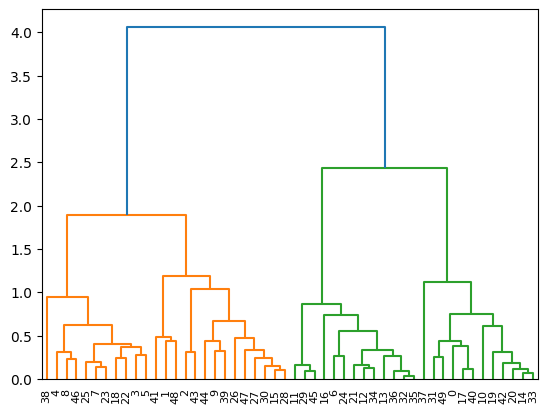

In [23]:
# Menampilkan dendogram
dendro = hierarchy.dendrogram(Y)

Kode tersebut melakukan Agglomerative Clustering dengan metode average linkage dan membangun dendrogram dengan menerapkan metode aglomerasi menggunakan single linkage berdasarkan matriks jarak (dist_matrix). Fungsi `linkage` dari modul `hierarchy` digunakan untuk membentuk struktur hierarki klaster, sementara fungsi `dendrogram` digunakan untuk menghasilkan representasi visual dari hierarki klaster dalam bentuk dendrogram. Ini memungkinkan untuk melihat bagaimana klaster digabungkan sepanjang proses aglomerasi dan menafsirkan hubungan antara klaster yang berbeda.

####Analisis Perbedaan Single dan Average Linkage

* Penggabungan Klaster: Pada Single Linkage, penggabungan klaster terjadi berdasarkan jarak terkecil antara satu titik dari satu klaster dengan satu titik dari klaster lain. Sebaliknya, Average Linkage menghitung rata-rata dari semua pasangan titik, sehingga lebih tahan terhadap pengaruh outliers.

* Sensitivitas terhadap Outliers: Single Linkage lebih sensitif terhadap outliers karena hanya mempertimbangkan jarak terkecil, sehingga titik yang berada jauh dari klaster lain dapat berpengaruh signifikan. Average Linkage, dengan mengambil rata-rata dari semua pasangan titik, lebih tahan terhadap pengaruh titik-titik yang berada jauh dari klaster lain.

* Karakteristik Visual Dendrogram: Dendrogram hasil dari Single Linkage cenderung memiliki cabang yang panjang dan beberapa cabang pendek, menciptakan struktur yang cenderung lebih cabang. Sedangkan, dendrogram dari Average Linkage cenderung menunjukkan cabang yang lebih merata dan tidak terlalu panjang, menciptakan struktur yang lebih seragam.

Dengan melihat dendrogram yang dihasilkan, dapat dilihat bahwa Single Linkage lebih fokus pada pasangan titik dengan jarak terdekat, menciptakan cabang dendrogram yang lebih panjang. Sebaliknya, Average Linkage lebih fokus pada rata-rata jarak antar-klaster sehingga menghasilkan cabang dendrogram yang lebih merata.

#### Plotting Single dan Average

In [29]:
# Agglomerative Clustering with Single Linkage
Z = AgglomerativeClustering(n_clusters=4, linkage='single')
y_single = Z.fit_predict(X1)

In [30]:
# Agglomerative Clustering with Average Linkage
Y = AgglomerativeClustering(n_clusters=4, linkage='average')
y_average = Y.fit_predict(X1)

Text(0.5, 1.0, 'Average Linkage Clustering')

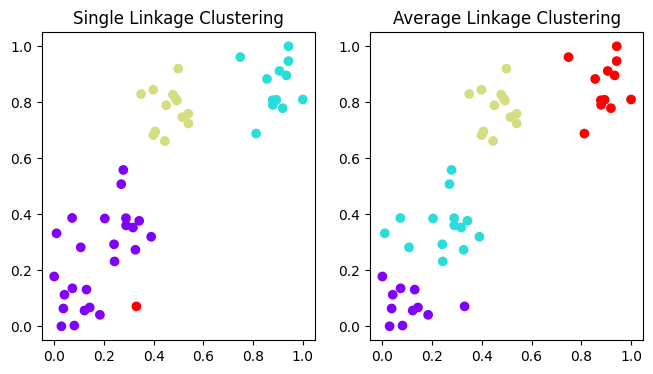

In [31]:
# Plotting
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(X1[:, 0], X1[:, 1], c = y_single, cmap='rainbow')
plt.title('Single Linkage Clustering')

plt.subplot(1, 3, 2)
plt.scatter(X1[:, 0], X1[:, 1], c=y_average, cmap='rainbow')
plt.title('Average Linkage Clustering')

#Agglomerative clustering untuk dataset cars_clustering

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Dataset

In [33]:
!wget -O cars_clus.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv

--2023-12-05 09:40:54--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17774 (17K) [text/csv]
Saving to: ‘cars_clus.csv’

cars_clus.csv       100%[===================>]  17.36K  --.-KB/s    in 0s      

2023-12-05 09:40:54 (214 MB/s) - ‘cars_clus.csv’ saved [17774/17774]



Read Dataset

In [34]:
filename = 'cars_clus.csv'

#Read csv
df = pd.read_csv(filename)
print ("Shape of dataset: ", df.shape)

df.head(5)

Shape of dataset:  (159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


Data Cleaning

In [35]:
print('Shape of dataset before cleaning: ', df.shape)
df[['sales', 'resale', 'type', 'price', 'engine_s', 'horsepow', 'wheelbas',
    'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg', 'lnsales']] = df[['sales', 'resale', 'type', 'price', 'engine_s', 'horsepow', 'wheelbas',
    'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')

df = df.dropna()
df = df.reset_index(drop=True)
print('Shape of dataset after cleaning: ', df.shape)
df.head()

Shape of dataset before cleaning:  (159, 16)
Shape of dataset after cleaning:  (117, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


Kode di atas berfungsi untuk melakukan pembersihan data dengan
mengubah kolom-kolom tertentu menjadi tipe data numerik, menghapus baris
yang mengandung nilai yang hilang (NaN), dan mengatur ulang indeks data.
Dapat dilihat juga shape of dataset sebelum dilakukan cleaning adalah (159, 16)
dan setelah dilakukan cleaning menjadi (117, 16).


Feature Selection



In [36]:
# Melakukan seleksi fitur
featureset = df [['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

In [38]:
# x berisikan nilai dari featureset yang akan digunakan pada normalisasi
x = featureset.values
# Membuat objek MinMaxScaler
min_max_scaler = MinMaxScaler()
# Menggunakan fit_transform untuk mengubah nilai variabel menjadi rentang 0 - 1
feature_mtx = min_max_scaler.fit_transform(x)
# Menampilkan 5 baris pertama hasil normalisasi
feature_mtx[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

Kode di atas menggunakan MinMaxScaler dari sklearn.preprocessing untuk melakukan penskalaan fitur pada variabel featureset. Data pada featureset diubah menjadi array NumPy menggunakan method `values`, kemudian dilakukan penskalaan menggunakan MinMaxScaler. Hasil dari proses penskalaan tersebut disimpan dalam variabel feature_mtx, yang berisi nilai-nilai fitur yang telah dinormalisasi sehingga rentang nilainya berada antara 0 dan 1.

##Clustering using Scipy

In [39]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

<ipython-input-39-643b1eed25c3>:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng,leng])


Kode di atas bertujuan untuk menghitung matriks jarak antar data menggunakan metrik jarak euclidean untuk data yang telah dinormalisasi dan disimpan dalam variabel feature_mtx.
Dengan cara ini, matriks D akan berisi jarak euclidean antara setiap pasangan data yang ada dalam matriks feature_mtx. Ini akan berguna dalam proses perhitungan pada algoritma Agglomerative Clustering yang memerlukan matriks jarak antar data sebagai salah satu input.

###Single Linkage

In [40]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'single')

<ipython-input-40-f3a0043c729f>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'single')


Kode di atas melakukan hierarchical clustering
pada matriks jarak D menggunakan metode single linkage. Hasil dari proses clustering disimpan dalam variabel Z.

In [ ]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

Kode di atas mengimpor fungsi fcluster dan mengaplikasikannya
untuk membentuk cluster berdasarkan matriks linkage X. Parameter max_d
digunakan sebagai batas jarak untuk membentuk cluster, dan
criterion='distance' menunjukkan bahwa batas jarak digunakan sebagai
kriteria. Hasilnya disimpan dalam variabel clusters.

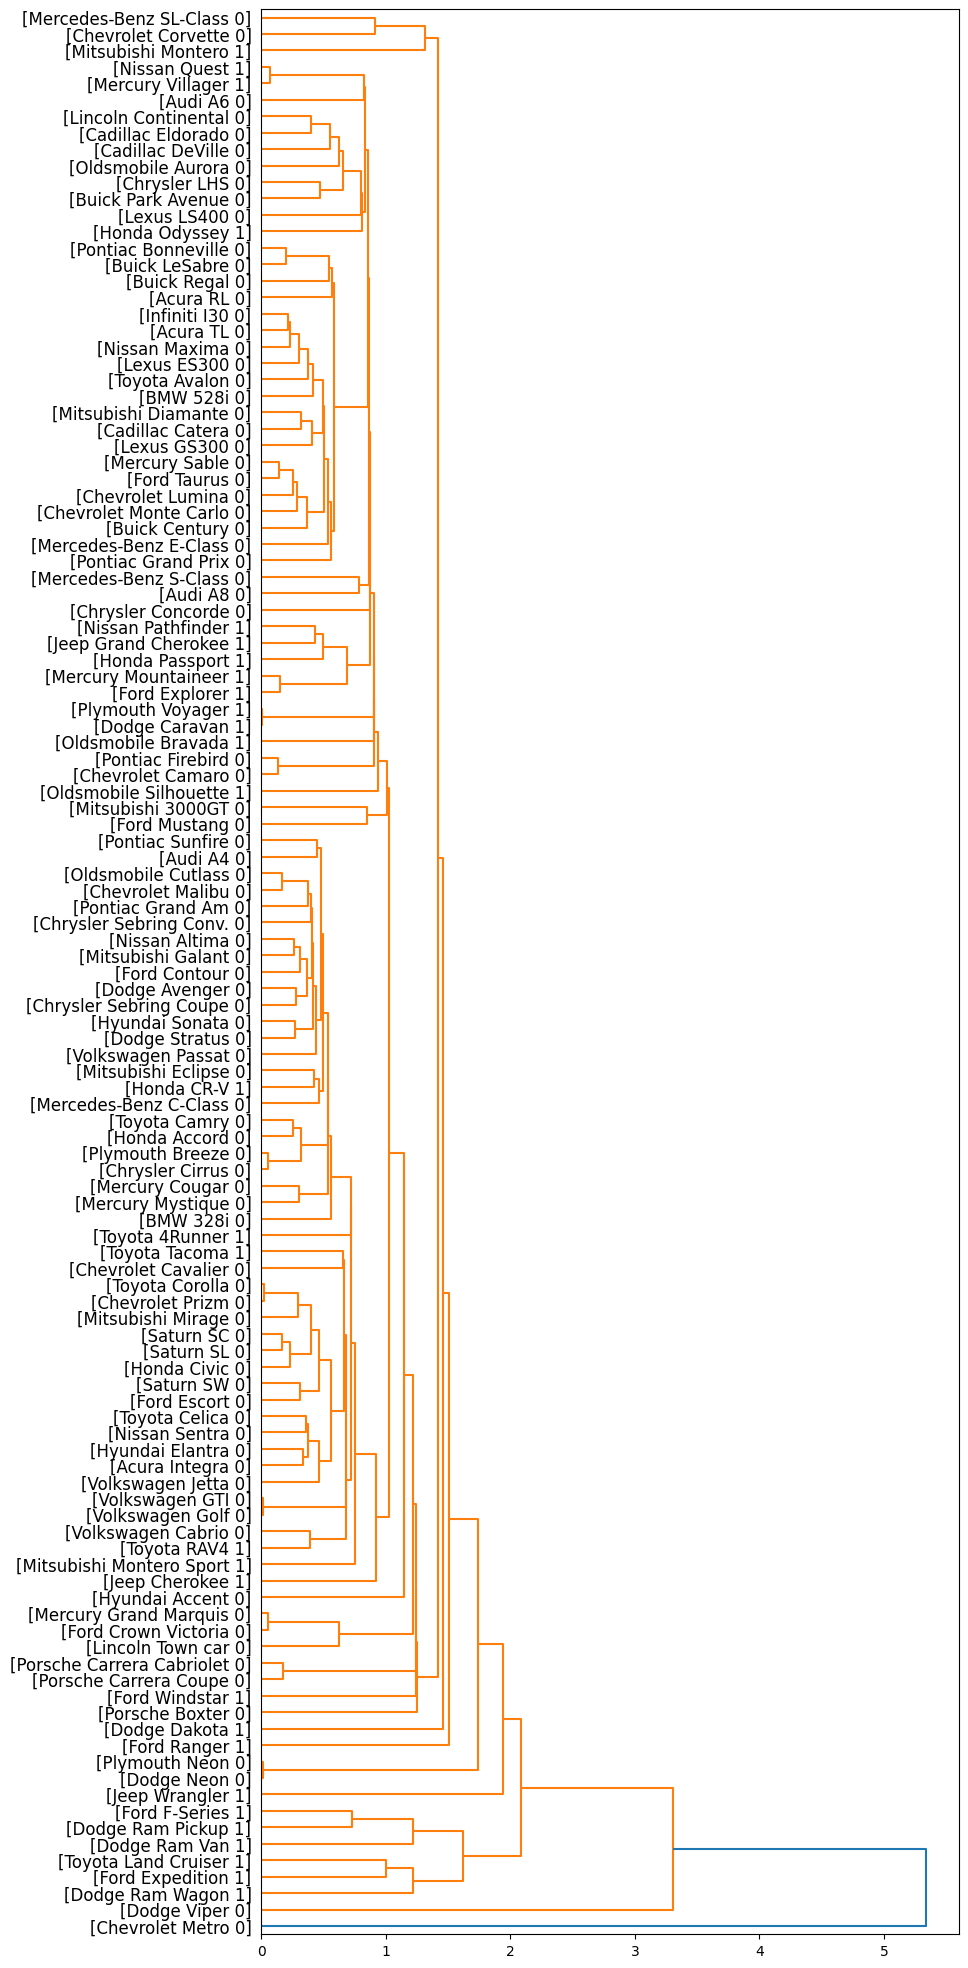

In [ ]:
fig = pylab.figure(figsize=(9,25))
def llf(id):
    return '[%s %s %s]' % (df['manufact'][id], df['model'][id], int(float(df['type'][id])) )

dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

Kode di atas digunakan untuk menciptakan sebuah dendrogram.
Fungsi llf digunakan untuk menghasilkan label untuk setiap leaf dalam dendrogram berdasarkan kolom-kolom tertentu dari dataset. Dendrogram dihasilkan dengan menggunakan fungsi hierarchy.dendrogram.


###Average Linkage

In [41]:
# Import library yang dibutuhkan
import pylab
import scipy.cluster.hierarchy
# Average Linkage
Z = hierarchy.linkage(D, 'average')

<ipython-input-41-1625b3c83ad2>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'average')


Kode di atas melakukan hierarchical clustering
pada matriks jarak D menggunakan metode average linkage. Hasil dari proses clustering disimpan dalam variabel Z.

In [42]:
from scipy.cluster.hierarchy import fcluster
# Batas jarak maksimum untuk membentuk cluster
max_d = 3
# Fungsi fcluster untuk menentukan cluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 4, 3,
       6, 5, 5, 5, 5, 5, 3, 5, 5, 2, 1, 1, 1, 4, 5, 3, 5, 5, 5, 4, 5, 4,
       1, 5, 1, 3, 5, 5, 5, 4, 3, 3, 5, 5, 3, 5, 5, 5, 5, 4, 4, 4, 3, 5,
       5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 3, 5, 5, 5, 5, 5, 4,
       5, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 5, 5, 3, 5, 3,
       5, 1, 3, 5, 5, 3, 3], dtype=int32)

Kode di atas mengimpor fungsi fcluster dan mengaplikasikannya
untuk membentuk cluster berdasarkan matriks linkage Y. Parameter max_d
digunakan sebagai batas jarak untuk membentuk cluster, dan
criterion='distance' menunjukkan bahwa batas jarak digunakan sebagai
kriteria. Hasilnya disimpan dalam variabel clusters.

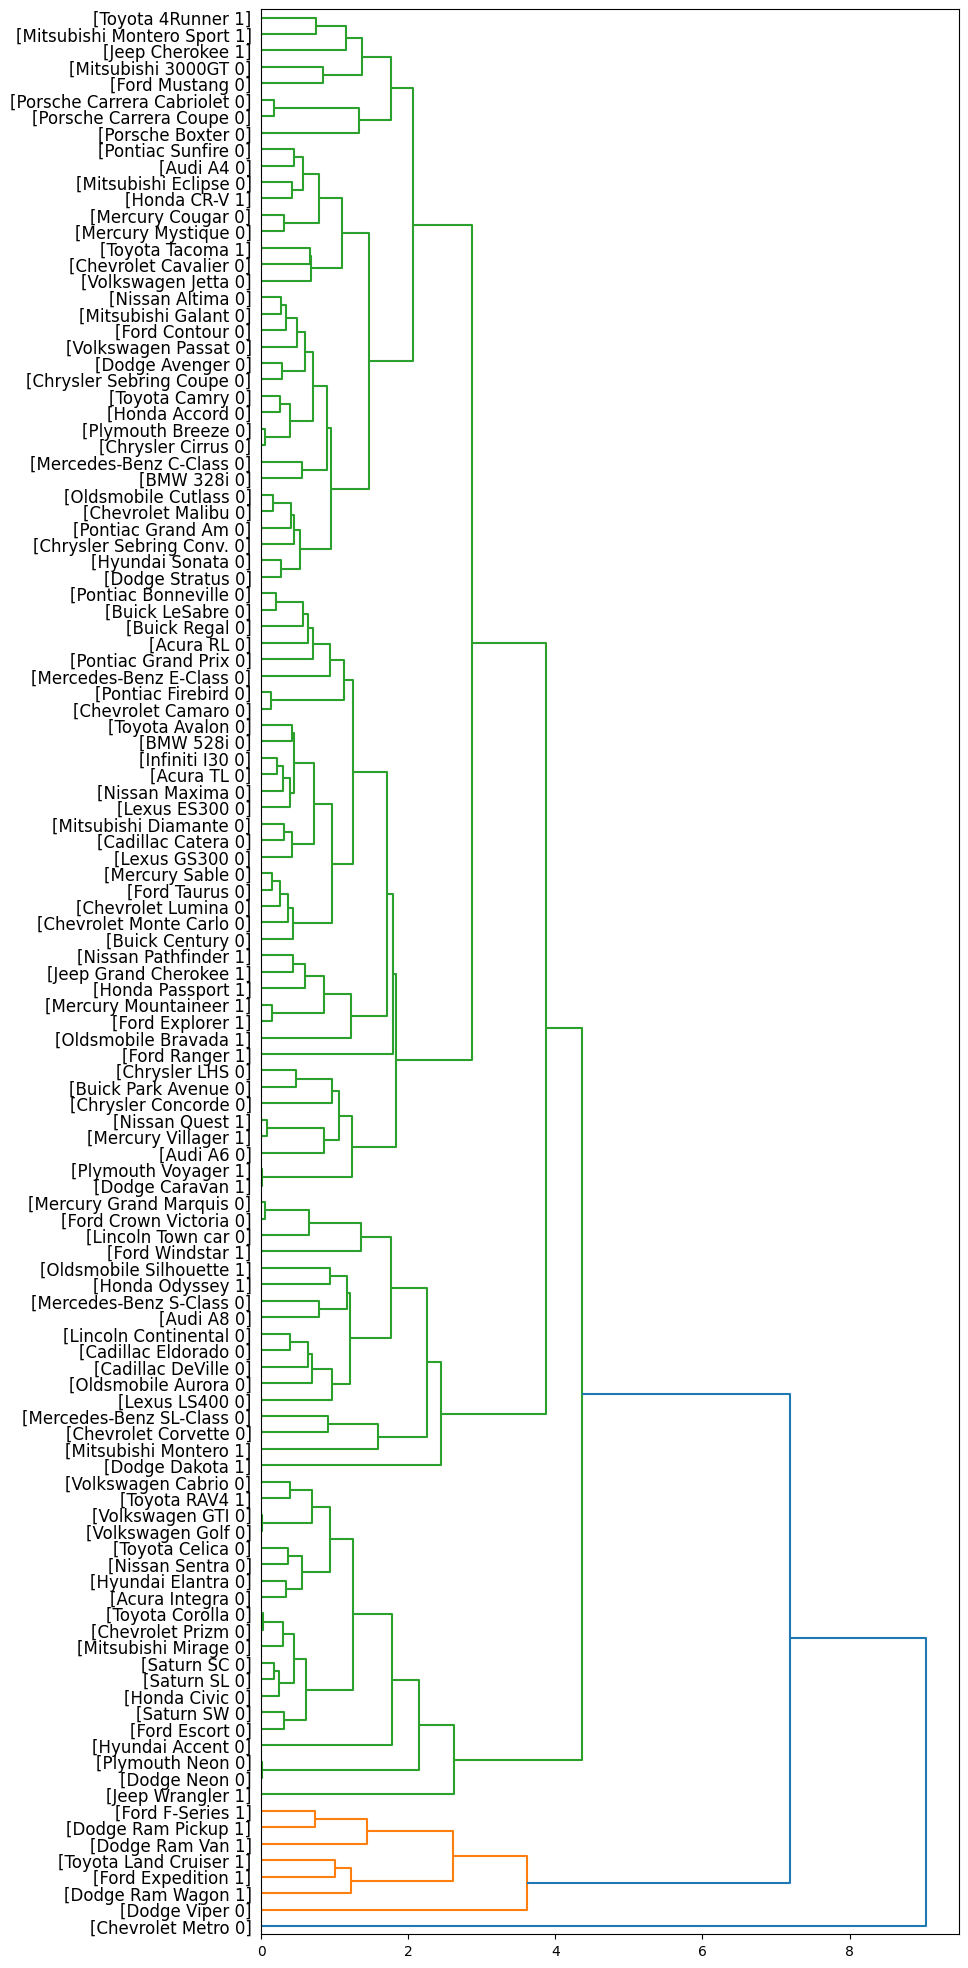

In [ ]:
# Ukuran figure yang dibuat
fig = pylab.figure(figsize=(9,25))
# Memberikan label pada leaf dendogram
def llf(id):
    return '[%s %s %s]' % (df['manufact'][id], df['model'][id], int(float(df['type'][id])) )
# Menampilkan dendogram
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

Kode tersebut digunakan untuk menjalankan
hierarchical clustering pada matriks jarak D dengan menggunakan metode
average linkage, dan hasil clustering disimpan dalam variabel Z. Selanjutnya,
dari hasil clustering ini, dibuat sebuah dendrogram yang dapat diilustrasikan
seperti diatas.



##Clustering with Scikit Learn

In [43]:
# Mencari jarak matriks
dist_matrix = distance_matrix(feature_mtx,feature_mtx)
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


Kode tersebut menggunakan fungsi `distance_matrix` untuk menghasilkan matriks jarak antara setiap pasangan data yang terdapat dalam `feature_mtx`. Matriks jarak ini berisi nilai jarak Euclidean antara setiap dua titik dalam dataset. Lebih jelasnya, setiap elemen (i, j) dalam matriks mewakili jarak antara data pada posisi ke-i dan ke-j dalam dataset yang disimpan dalam `feature_mtx`. Dengan menggunakan fungsi `distance_matrix`, matriks jarak ini dapat disusun dengan lebih efisien tanpa perlu melakukan perulangan langsung untuk menghitung jarak antar pasangan data.

###Single Linkage

In [45]:
# Membuat objek dari kelas AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'single')
# Melakukan clustering
agglom.fit(feature_mtx)
agglom.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0])

Kode tersebut menggunakan `AgglomerativeClustering` untuk melakukan agglomerative clustering dengan tujuan membentuk 6 klaster dan menerapkan metode single linkage. Setelah model dijalankan pada data yang telah dinormalisasi (`feature_mtx`) menggunakan metode `fit`, label-label kelompok hasil dari proses clustering dapat diperoleh dengan mengakses atribut `.labels_` pada objek `agglom`. Dengan cara ini, kita dapat mengakses label-label klaster yang telah dibentuk untuk setiap titik data dalam dataset.

In [46]:
# Menambah kolom baru kedalam DataFrame car
df['cluster_'] = agglom.labels_
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,0


<ipython-input-52-787a7a1aa25f>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)


Text(0, 0.5, 'mpg')

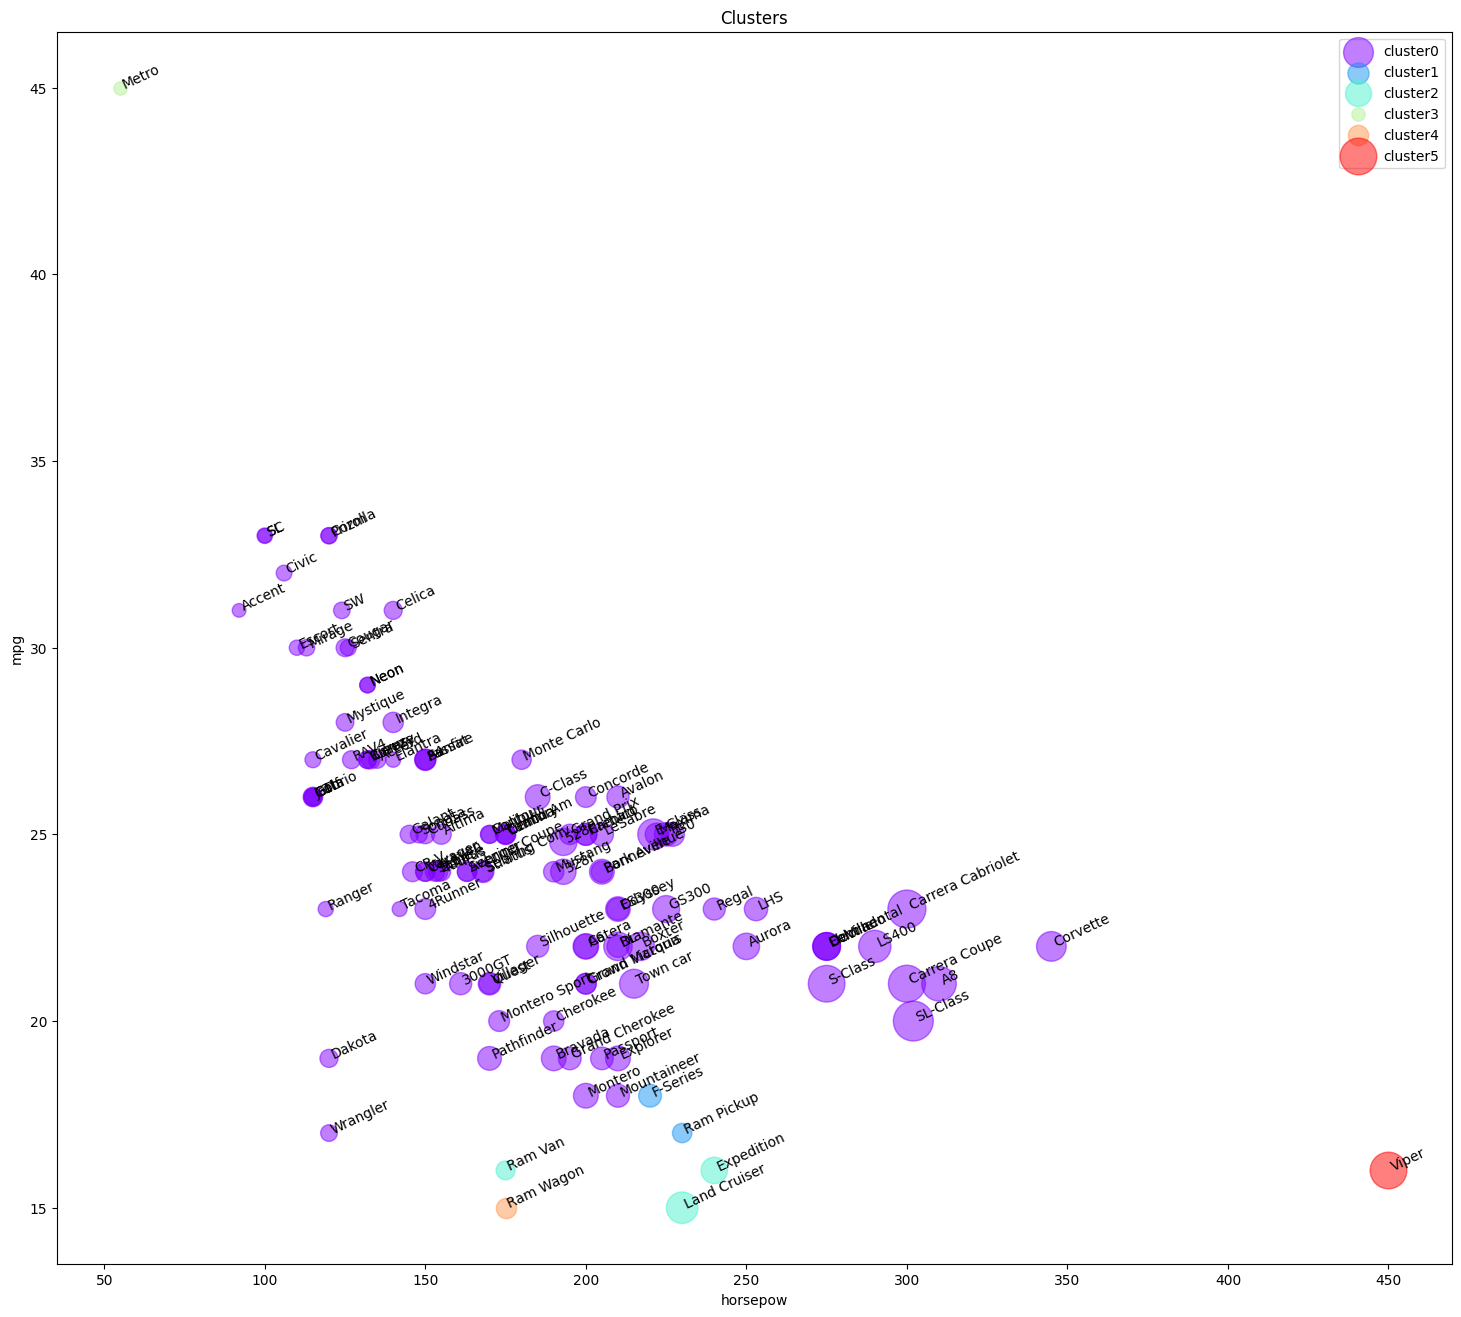

In [52]:
import matplotlib.cm as cm
# Inisialisasi warna dan label clustering
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
# Membuat daftar label cluster
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(18,16))
# Visualisasi cluster
for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25)
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

Kode tersebut menggunakan modul `matplotlib.cm` untuk membuat skema warna pelangi yang terbagi menjadi sejumlah warna sesuai dengan jumlah kelompok (n_clusters) yang telah dibentuk sebelumnya. Selanjutnya, dilakukan iterasi terhadap setiap klaster yang terbentuk, dan untuk setiap titik data dalam klaster tersebut, dilakukan plotting menggunakan `plt.scatter`. Pada saat plotting, ukuran titik (s) dan warna (c) ditentukan berdasarkan nilai harga (price) dari setiap titik data. Grafik yang dihasilkan menunjukkan visualisasi seluruh klaster dalam satu gambar, dimana titik-titik data dari klaster yang berbeda ditampilkan dengan warna yang berbeda pula, memperlihatkan distribusi titik-titik data berdasarkan nilai harga (price) dalam masing-masing klaster.

In [53]:
# Menghitung tipe pada setiap cluster
df.groupby(['cluster_','type'])['cluster_'].count()

cluster_  type
0         0.0     86
          1.0     23
1         1.0      2
2         1.0      3
3         0.0      1
4         1.0      1
5         0.0      1
Name: cluster_, dtype: int64

Kode di atas menggunakan metode `groupby` pada data frame `df`. Data diorganisir berdasarkan indeks yang terbentuk dari kolom `cluster_` dan `type`. Selanjutnya, dilakukan penghitungan jumlahnya dengan menggunakan fungsi `count()`. Outputnya berupa tabel frekuensi yang menunjukkan jumlah data untuk setiap kombinasi nilai pada kolom `cluster_` dan `type`. Tabel ini memberikan informasi mengenai sebaran data dalam setiap klaster (`cluster_`) dan jenis (`type`) yang terdapat dalam dataset.

In [54]:
# Karakteristik tiap cluster
agg_cars = df.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()
agg_cars

<ipython-input-54-a9701cdb999c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_cars = df.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()


horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   181.197674  2.902326  25.358140  26.286779
         1.0   167.478261  3.095652  21.000000  22.811261
1        1.0   225.000000  4.900000  17.500000  23.197500
2        1.0   215.000000  4.400000  15.666667  35.479333
3        0.0    55.000000  1.000000  45.000000   9.235000
4        1.0   175.000000  3.900000  15.000000  21.315000
5        0.0   450.000000  8.000000  16.000000  69.725000

Kode di atas menggunakan metode `groupby` pada data frame `df` untuk membuat indeks berdasarkan kolom `cluster_` dan `type`. Kemudian, dilakukan aggregasi terhadap kolom-kolom numerik seperti 'horsepow', 'engine_s', 'mpg', dan 'price' menggunakan fungsi `mean()`. Hasilnya adalah pembentukan data frame baru yang disimpan dalam variabel `agg_cars`. Data frame `agg_cars` berisi nilai rata-rata untuk setiap kombinasi nilai pada kolom `cluster_` dan `type` untuk kolom-kolom yang telah disebutkan sebelumnya. Dengan ini, kita dapat melihat nilai rata-rata dari atribut-atribut mobil untuk setiap kelompok dan jenis mobil yang telah terbentuk dari proses pengelompokan sebelumnya.

<ipython-input-55-36e178442d0f>:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))


Text(0, 0.5, 'mpg')

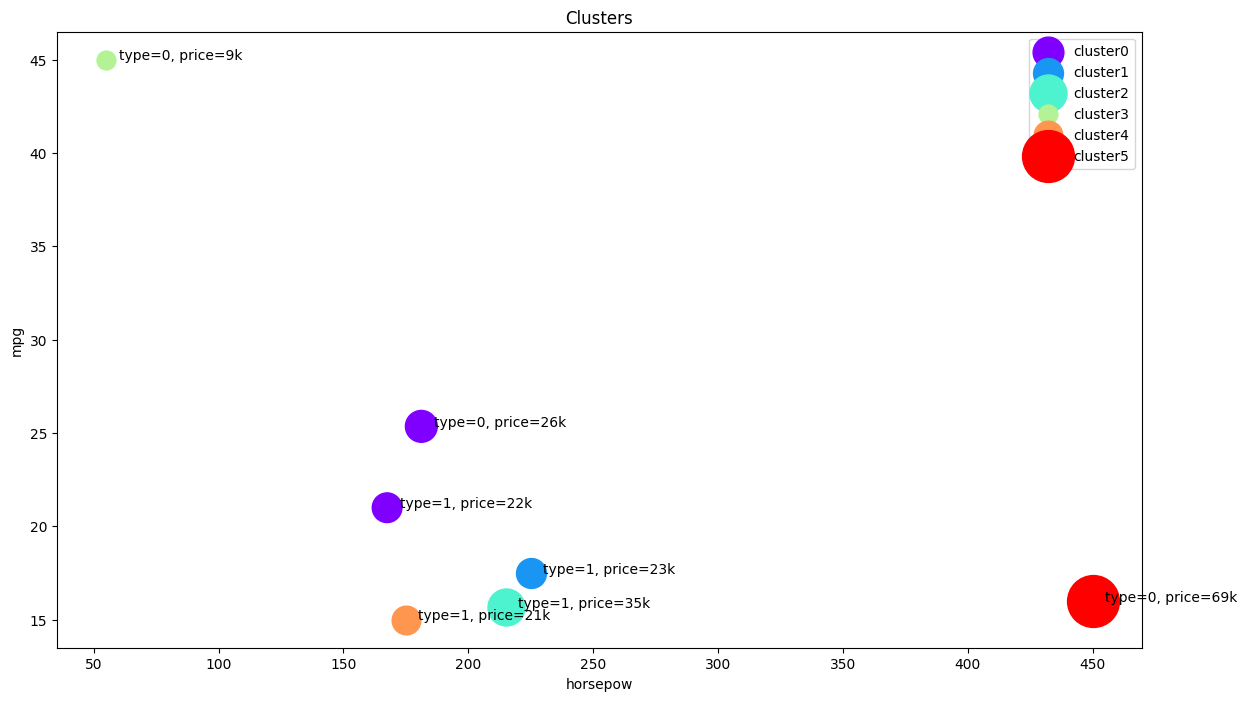

In [55]:
# Membuat objek gambar
plt.figure(figsize=(14,8))
# Visualisasi tiap cluster
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

Kode ini menciptakan scatter plot untuk memvisualisasikan hasil dari proses clustering. Setiap titik dalam plot mewakili satu klaster dengan warna yang berbeda, dan ukuran titik menunjukkan harga (price) dari setiap klaster. Pada setiap titik dalam plot, ditambahkan teks yang menunjukkan jenis mobil (type) dan harga dari klaster tersebut. Visualisasi ini membantu dalam memahami distribusi klaster yang berbeda serta memperlihatkan harga dan jenis mobil yang terdapat dalam setiap klaster secara visual.

###Average Linkage

In [56]:
# Membuat objek dari kelas AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'average')
# Melakukan clustering
agglom.fit(feature_mtx)
agglom.labels_

array([0, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 1, 0,
       3, 0, 0, 4, 0, 4, 0, 0, 0, 1, 5, 2, 2, 4, 4, 0, 4, 0, 4, 4, 4, 4,
       2, 4, 5, 0, 0, 0, 4, 4, 0, 0, 0, 4, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0,
       0, 4, 0, 4, 0, 0, 0, 4, 4, 4, 4, 0, 4, 4, 1, 0, 0, 4, 4, 4, 0, 4,
       4, 4, 0, 0, 4, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0])

In [57]:
# Menambahkan kolom baru kedalam DataFrame car
df['cluster_'] = agglom.labels_
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,4
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,4
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,4


<ipython-input-58-a08aa1622caa>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)


Text(0, 0.5, 'mpg')

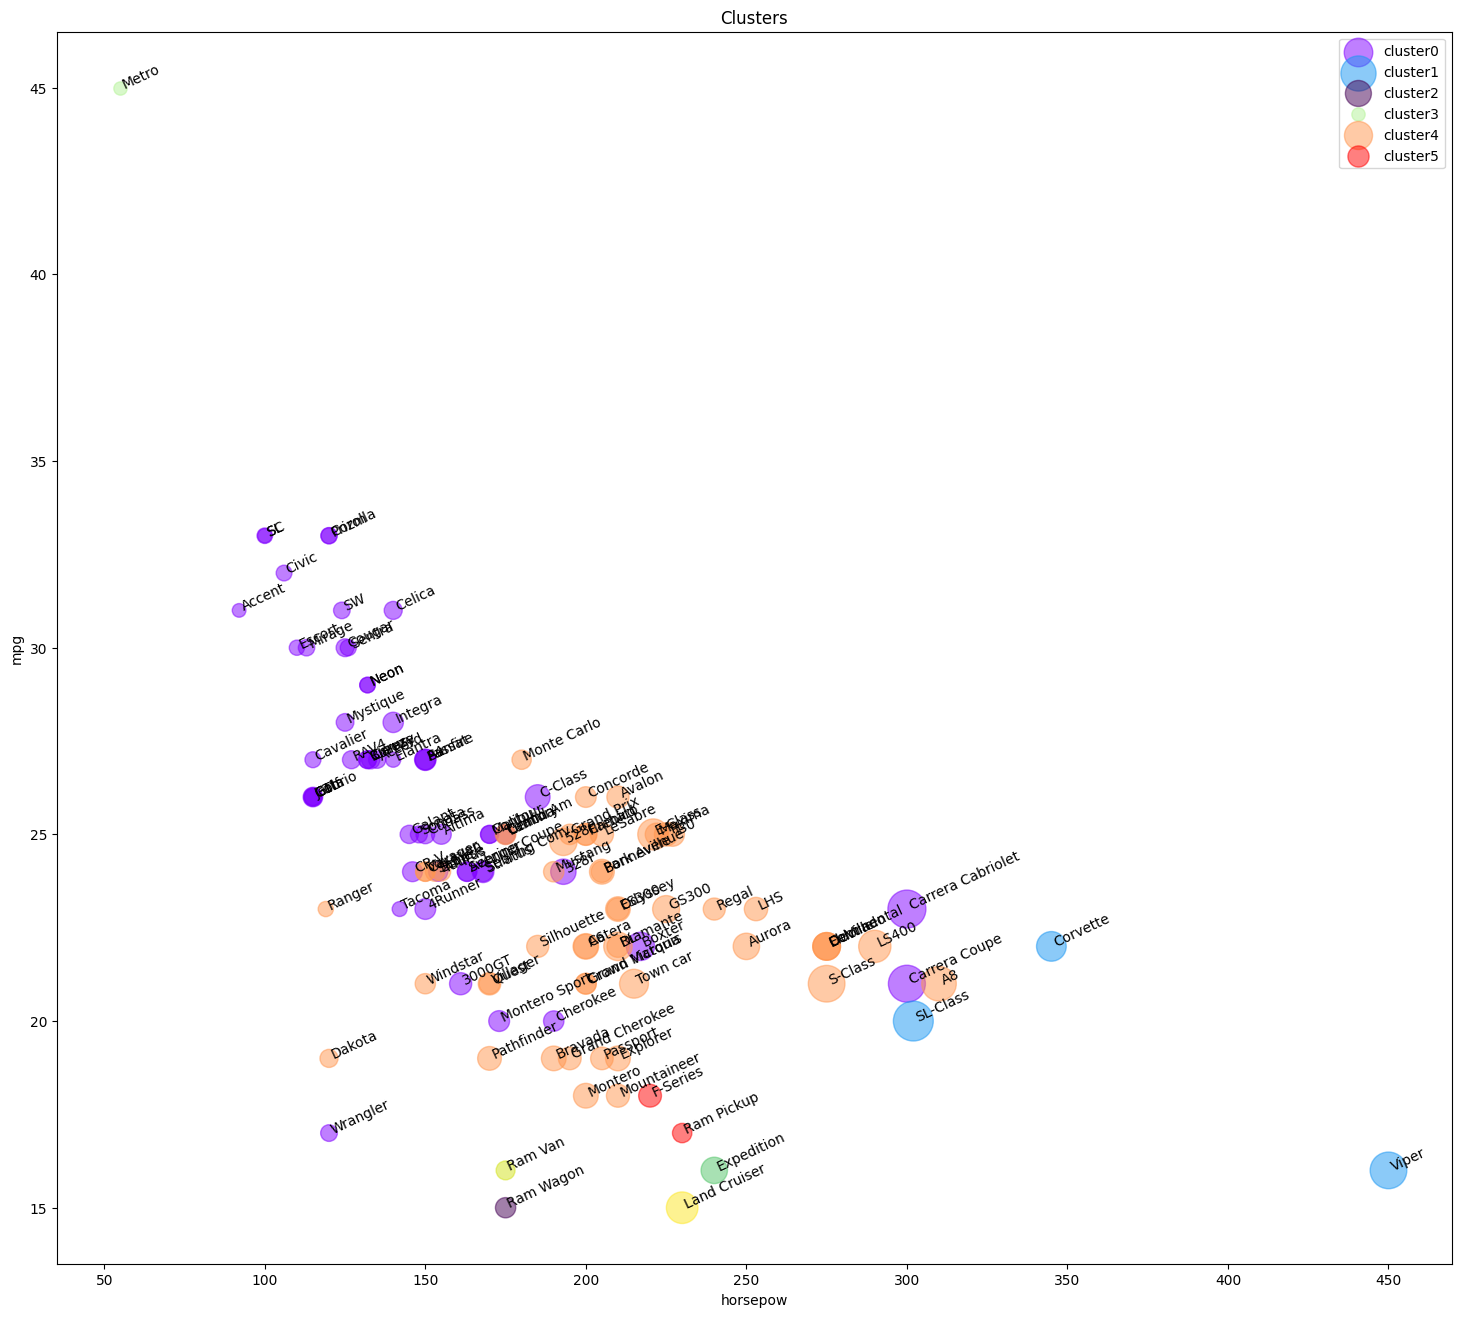

In [58]:
import matplotlib.cm as cm
# Inisialisasi Warna dan Label Cluster
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
# Membuat daftar label cluster
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(18,16))

#Visualisasi tiap cluster
for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25)
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

In [59]:
# Menghitung tipe setiap cluster
df.groupby(['cluster_','type'])['cluster_'].count()

cluster_  type
0         0.0     47
          1.0      7
1         0.0      3
2         1.0      4
3         0.0      1
4         0.0     37
          1.0     16
5         1.0      2
Name: cluster_, dtype: int64

In [60]:
# Karakteristik tiap cluster
agg_cars = df.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()
agg_cars

<ipython-input-60-13a65ad38652>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_cars = df.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()


horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   146.531915  2.246809  27.021277  20.306128
         1.0   149.714286  2.657143  22.000000  18.551571
1        0.0   365.666667  6.233333  19.333333  66.010000
2        1.0   205.000000  4.275000  15.500000  31.938250
3        0.0    55.000000  1.000000  45.000000   9.235000
4        0.0   217.540541  3.602703  23.481081  31.837027
         1.0   175.250000  3.287500  20.562500  24.674875
5        1.0   225.000000  4.900000  17.500000  23.197500

<ipython-input-61-2f2213b277b6>:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))


Text(0, 0.5, 'mpg')

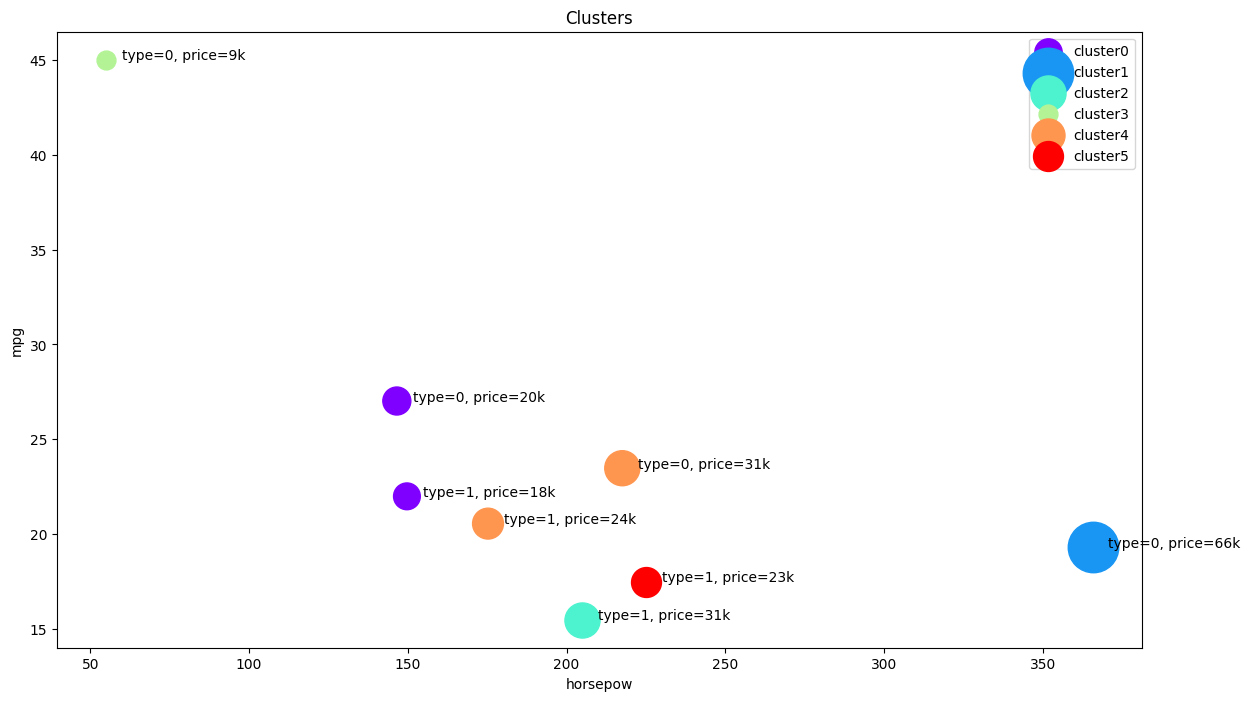

In [61]:
# Membuat objek gambar
plt.figure(figsize=(14,8))
# Visualisasi setiap cluster
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

#### Analisis Perbedaan Single dan Average Linkage

1. **Penggabungan Klaster:** Single Linkage menggabungkan klaster berdasarkan jarak terkecil antara satu titik dari klaster pertama dan satu titik dari klaster kedua, yang menjadikan pasangan titik dengan jarak terdekat menjadi faktor utama dalam penggabungan. Di sisi lain, Average Linkage menggunakan rata-rata dari semua pasangan titik, sehingga lebih tahan terhadap pengaruh dari pasangan titik dengan jarak ekstrim.

2. **Sensitivitas terhadap Outliers:** Single Linkage lebih sensitif terhadap outliers karena hanya memperhatikan jarak terkecil, sehingga titik yang berada jauh dari klaster lain dapat memengaruhi hasil secara signifikan. Sebaliknya, Average Linkage lebih tahan terhadap pengaruh titik-titik yang berada jauh dari klaster lain karena mengambil rata-rata dari semua pasangan titik.

3. **Visualisasi Dendrogram:** Dendrogram hasil dari Single Linkage cenderung memiliki cabang yang lebih panjang, dengan beberapa cabang yang lebih pendek, menciptakan struktur yang cenderung bercabang-ranting. Sementara itu, dendrogram dari Average Linkage menunjukkan cabang yang lebih merata dan tidak terlalu panjang, menciptakan struktur yang lebih seragam dan seimbang.

Dari hasil dendrogram, terlihat bahwa Single Linkage lebih memperhatikan pasangan titik dengan jarak terdekat, yang menghasilkan cabang dendrogram yang lebih panjang. Sebaliknya, Average Linkage lebih fokus pada rata-rata jarak antar-klaster sehingga menghasilkan cabang dendrogram yang lebih merata.

#Agglomerative clustering untuk dataset Iris

Import Dataset

In [62]:
# Import library dan dataset
from sklearn.datasets import load_iris
iris = load_iris()
pdf = pd.DataFrame(iris.data, columns=iris.feature_names)
pdf['target'] = iris.target
df1 = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=['petal_length', 'petal_width', 'sepal_length', 'sepal_width', 'classes'])
df1.head()

,petal_length,petal_width,sepal_length,sepal_width,classes
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [64]:
# x berisikan nilai dari featureset yang nantinya akan digunakan untuk normalisasi
x = pdf.values
# Membuat MinMaxSclare
min_max_scaler = MinMaxScaler()
# Mengubah nilai variabel dalam rentang 0 - 1
feature_mtx1 = min_max_scaler.fit_transform(x)
feature_mtx1[0:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667, 0.        ],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667, 0.        ],
       [0.11111111, 0.5       , 0.05084746, 0.04166667, 0.        ],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667, 0.        ],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667, 0.        ]])

In [65]:
x = df1[['petal_length', 'petal_width', 'sepal_length', 'sepal_width']]
min_max_scaler = MinMaxScaler()
feature_mtx1 = min_max_scaler.fit_transform(x)
feature_mtx1[0:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [66]:
# Mendapatkan jumlah baris dalam feature_mtx1
leng = feature_mtx1.shape[0]
# Inisialisasi matriks jarak A dengan nol
A = scipy.zeros([leng, leng])
# Menghitung jarak eucldiean untuk setiap pasangan data dalam feture_mtx1
for i in range(leng):
  for j in range(leng):
    A[i, j] = scipy.spatial.distance.euclidean(feature_mtx1[i], feature_mtx1[j])

<ipython-input-66-d1fff381a6f9>:2: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  A = scipy.zeros([leng, leng])


##Clustering Scipy

In [ ]:
# Agglomerative Clustering with scipy library (Scientific Python)
import scipy
from scipy.cluster import hierarchy
# Mendapatkan jumlah baris dalam feature_mtx
leng = feature_mtx. shape[0]
# Inisialisasi matriks jarak D dengan nol
D = scipy.zeros ([leng, leng])

# Menghitung jarak euclidean untuk setiap pasangan data dalam featur_mtx
for i in range(leng):
  for j in range(leng):
    D[i,j] - scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])
# Single Linkage
iris_single = hierarchy.linkage(D, 'single')
# Average Linkage
iris_average = hierarchy.linkage(D, 'average')
# Compelte Linkage
iris_complete = hierarchy. linkage(D, 'complete')

<ipython-input-44-37576d9b2099>:5: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros ([leng, leng])
<ipython-input-44-37576d9b2099>:11: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  iris_single = hierarchy.linkage(D, 'single')
<ipython-input-44-37576d9b2099>:13: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  iris_average = hierarchy.linkage(D, 'average')
<ipython-input-44-37576d9b2099>:15: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  iris_complete = hierarchy. linkage(D, 'complete')


In [ ]:
def call(id):
  return '[%s]' % (iris.target_names[pdf['target'][id]])

/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:2844: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([0, dvw])


Text(0.5, 1.0, 'Single Linkage')

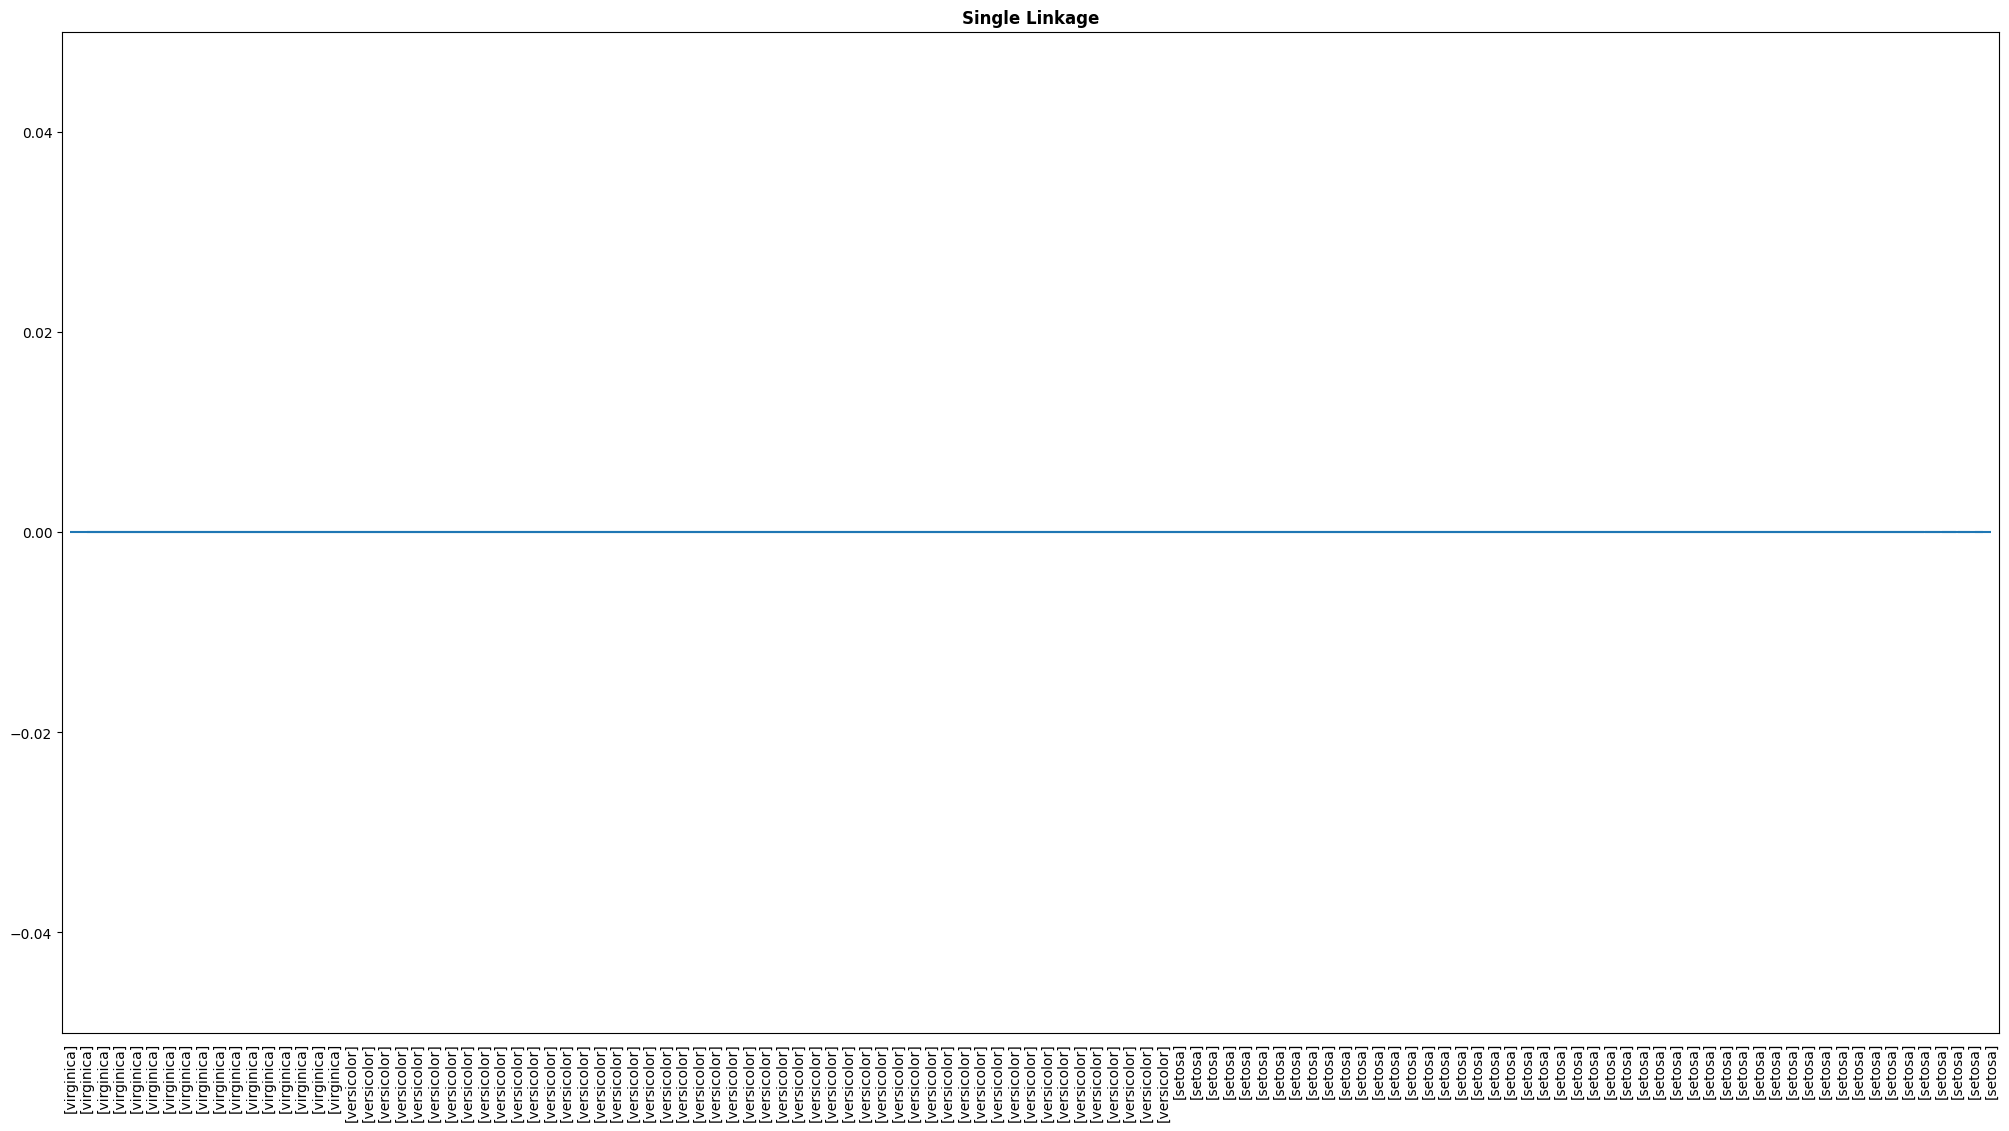

In [ ]:
fig = plt.figure(figsize=(25,13))
dendro1 = hierarchy.dendrogram(iris_single, leaf_label_func=call, leaf_rotation=90, leaf_font_size=10, orientation = 'top')
plt.title("Single Linkage", fontdict={'weight':'bold'})

## Clustering petal_length and petal_width

### Single Linkage

In [ ]:
agglom_s = AgglomerativeClustering(n_clusters = 5, linkage = 'single')
agglom_s.fit(feature_mtx1)
agglom_s.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
df1['cluster_'] = agglom_s.labels_
df1.head()

,petal_length,petal_width,sepal_length,sepal_width,classes,cluster_
0,5.1,3.5,1.4,0.2,Iris-setosa,2
1,4.9,3.0,1.4,0.2,Iris-setosa,2
2,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4.6,3.1,1.5,0.2,Iris-setosa,2
4,5.0,3.6,1.4,0.2,Iris-setosa,2


<ipython-input-49-fa299e8b16aa>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.petal_length, subset.petal_width, c=color, label='cluster'+str(label), alpha=0.5)


Text(0, 0.5, 'petal-width')

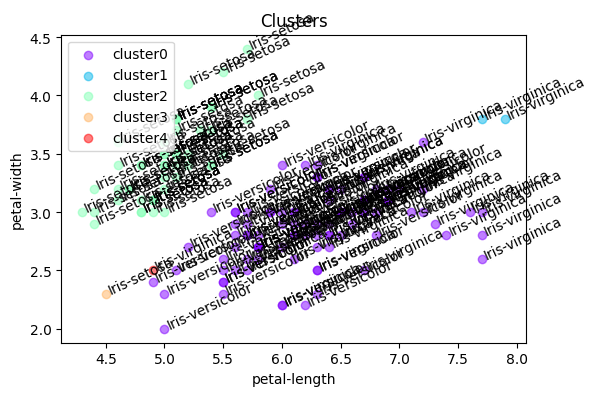

In [ ]:
n_clusters = max(agglom_s.labels_) + 1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches
plt.figure(figsize=(6, 4))

for color, label in zip(colors, cluster_labels):
  subset = df1[df1.cluster_ == label]
  for i in subset.index:
    plt.text(subset.petal_length[i], subset.petal_width[i], str(subset['classes'][i]), rotation=25)
  plt.scatter(subset.petal_length, subset.petal_width, c=color, label='cluster'+str(label), alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('petal-length')
plt.ylabel('petal-width')

In [ ]:
df1.groupby(['cluster_', 'classes'])['cluster_'].count()

cluster_  classes        
0         Iris-versicolor    50
          Iris-virginica     47
1         Iris-virginica      2
2         Iris-setosa        49
3         Iris-setosa         1
4         Iris-virginica      1
Name: cluster_, dtype: int64

In [ ]:
agg_petal = df1.groupby(['cluster_', 'classes'])['petal_length', 'petal_width', 'sepal_length', 'sepal_width'].mean()
agg_petal

<ipython-input-51-25c8c225a1dc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_petal = df1.groupby(['cluster_', 'classes'])['petal_length', 'petal_width', 'sepal_length', 'sepal_width'].mean()


petal_length  petal_width  sepal_length  sepal_width
cluster_ classes                                                              
0        Iris-versicolor      5.936000     2.770000      4.260000     1.326000
         Iris-virginica       6.572340     2.948936      5.531915     2.029787
1        Iris-virginica       7.800000     3.800000      6.550000     2.100000
2        Iris-setosa          5.016327     3.440816      1.467347     0.242857
3        Iris-setosa          4.500000     2.300000      1.300000     0.300000
4        Iris-virginica       4.900000     2.500000      4.500000     1.700000

<ipython-input-52-00c5a4727209>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.petal_length, subset.petal_width, s=100, c=color, label='cluster'+str(label))


Text(0, 0.5, 'petal_width')

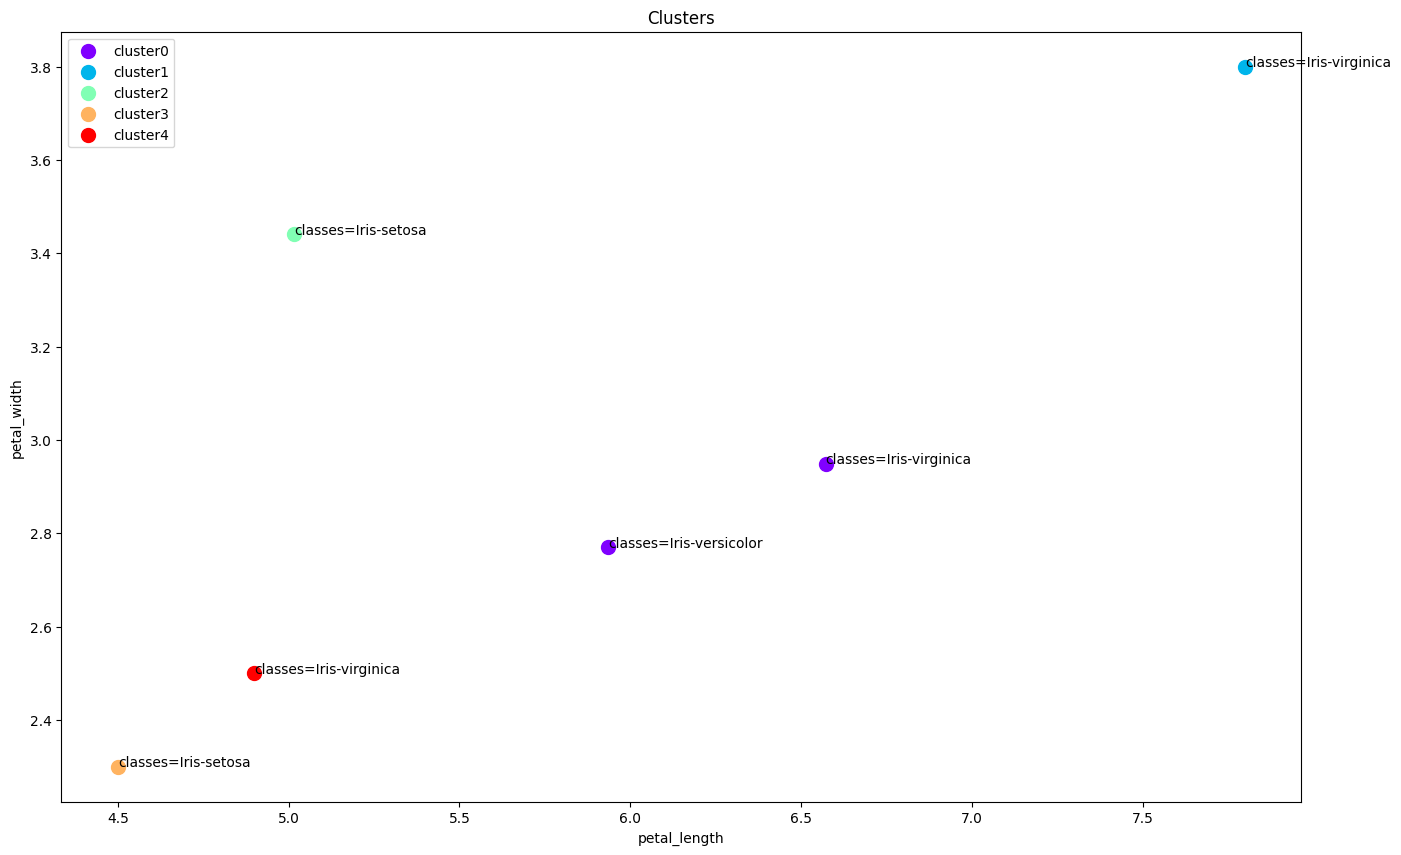

In [ ]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
  subset = agg_petal.loc[(label,),]
  for i in subset.index:
    plt.text(subset.petal_length[i], subset.petal_width[i], 'classes='+str(i))
  plt.scatter(subset.petal_length, subset.petal_width, s=100, c=color, label='cluster'+str(label))

plt.legend()
plt.title('Clusters')
plt.xlabel('petal_length')
plt.ylabel('petal_width')

### Average Linkage

In [ ]:
agglom_a = AgglomerativeClustering(n_clusters = 5, linkage = 'average')
agglom_a.fit(feature_mtx1)
agglom_a.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 2, 4, 0, 4, 0, 0, 0, 0, 2, 0, 4, 0,
       0, 4, 0, 4, 4, 0, 0, 0, 0, 4, 0, 4, 0, 4, 0, 0, 4, 4, 0, 0, 0, 0,
       0, 4, 4, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 4])

In [ ]:
df1['cluster2_'] = agglom_a.labels_
df1.head()

,petal_length,petal_width,sepal_length,sepal_width,classes,cluster_,cluster2_
0,5.1,3.5,1.4,0.2,Iris-setosa,2,1
1,4.9,3.0,1.4,0.2,Iris-setosa,2,1
2,4.7,3.2,1.3,0.2,Iris-setosa,2,1
3,4.6,3.1,1.5,0.2,Iris-setosa,2,1
4,5.0,3.6,1.4,0.2,Iris-setosa,2,1


<ipython-input-55-96a459b025c9>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.petal_length, subset.petal_width, c=color, label='cluster'+str(label), alpha=0.5)


Text(0, 0.5, 'petal-width')

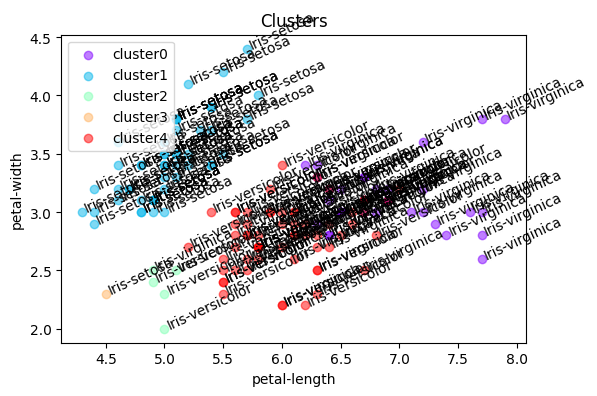

In [ ]:
n_clusters = max(agglom_a.labels_) + 1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches
plt.figure(figsize=(6, 4))

for color, label in zip(colors, cluster_labels):
  subset = df1[df1.cluster2_ == label]
  for i in subset.index:
    plt.text(subset.petal_length[i], subset.petal_width[i], str(subset['classes'][i]), rotation=25)
  plt.scatter(subset.petal_length, subset.petal_width, c=color, label='cluster'+str(label), alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('petal-length')
plt.ylabel('petal-width')

In [ ]:
df1.groupby(['cluster2_', 'classes'])['cluster2_'].count()

cluster2_  classes        
0          Iris-virginica     33
1          Iris-setosa        49
2          Iris-versicolor     4
           Iris-virginica      1
3          Iris-setosa         1
4          Iris-versicolor    46
           Iris-virginica     16
Name: cluster2_, dtype: int64

In [ ]:
agg_petal2 = df1.groupby(['cluster_', 'classes'])['petal_length', 'petal_width', 'sepal_length', 'sepal_width'].mean()
agg_petal2

<ipython-input-57-2c9c62313ac3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_petal2 = df1.groupby(['cluster_', 'classes'])['petal_length', 'petal_width', 'sepal_length', 'sepal_width'].mean()


petal_length  petal_width  sepal_length  sepal_width
cluster_ classes                                                              
0        Iris-versicolor      5.936000     2.770000      4.260000     1.326000
         Iris-virginica       6.572340     2.948936      5.531915     2.029787
1        Iris-virginica       7.800000     3.800000      6.550000     2.100000
2        Iris-setosa          5.016327     3.440816      1.467347     0.242857
3        Iris-setosa          4.500000     2.300000      1.300000     0.300000
4        Iris-virginica       4.900000     2.500000      4.500000     1.700000

<ipython-input-58-9f7e9ade7cf1>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.petal_length, subset.petal_width, s=100, c=color, label='cluster'+str(label))


Text(0, 0.5, 'petal_width')

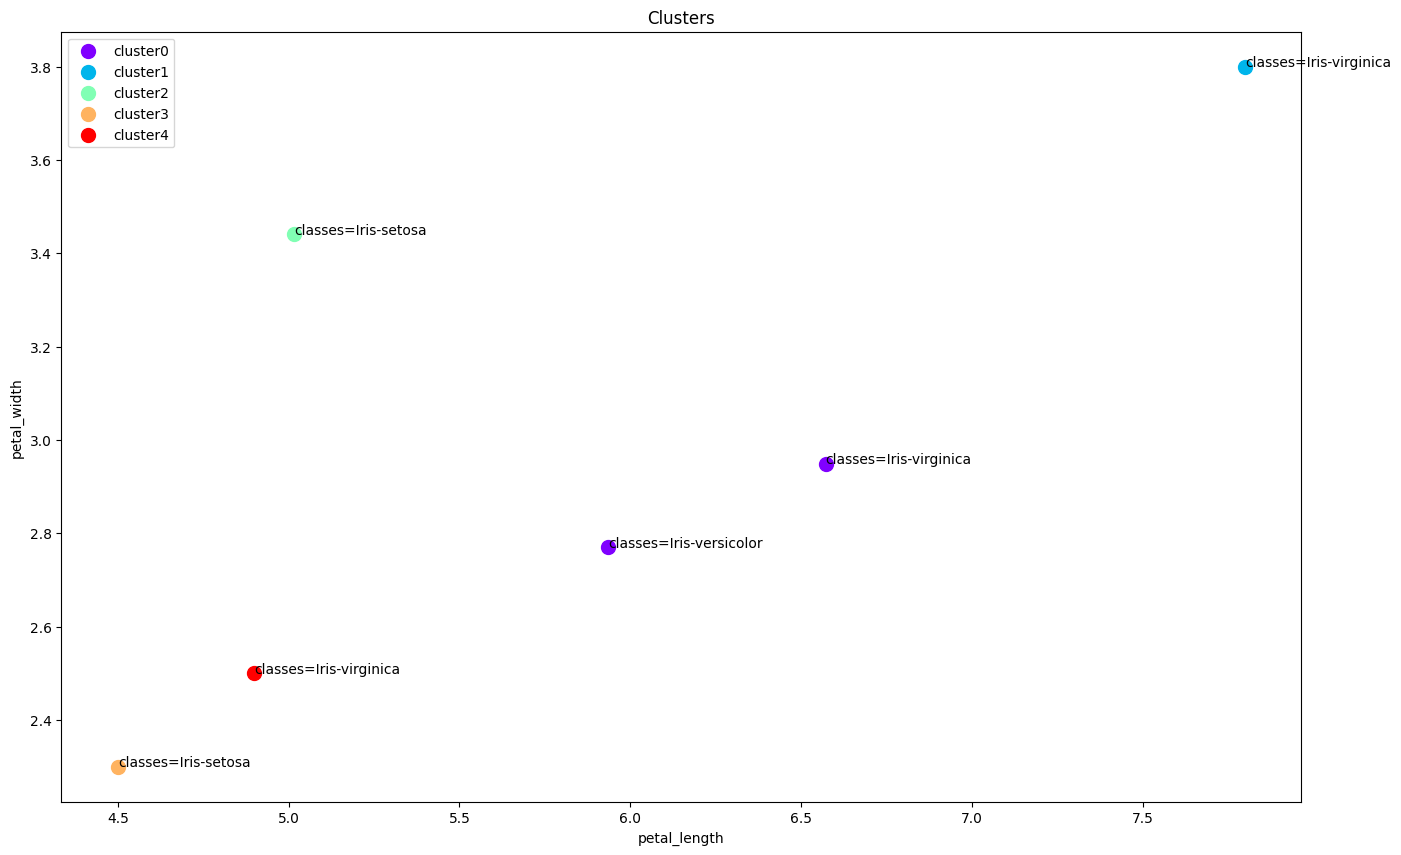

In [ ]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
  subset = agg_petal2.loc[(label,),]
  for i in subset.index:
    plt.text(subset.petal_length[i], subset.petal_width[i], 'classes='+str(i))
  plt.scatter(subset.petal_length, subset.petal_width, s=100, c=color, label='cluster'+str(label))

plt.legend()
plt.title('Clusters')
plt.xlabel('petal_length')
plt.ylabel('petal_width')

### Complete Linkage

In [ ]:
agglom_c = AgglomerativeClustering(n_clusters = 5, linkage = 'complete')
agglom_c.fit(feature_mtx1)
agglom_c.labels_

array([2, 3, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2,
       2, 3, 2, 3, 2, 2, 1, 1, 1, 4, 1, 4, 1, 4, 1, 4, 4, 1, 4, 1, 4, 1,
       4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 0, 1, 4, 4, 4, 4, 1, 4, 1, 1, 4,
       4, 4, 4, 1, 4, 4, 4, 4, 4, 1, 4, 4, 0, 1, 0, 0, 0, 0, 4, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 4, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
df1['cluster3_'] = agglom_c.labels_
df1.head()

,petal_length,petal_width,sepal_length,sepal_width,classes,cluster_,cluster2_,cluster3_
0,5.1,3.5,1.4,0.2,Iris-setosa,2,1,2
1,4.9,3.0,1.4,0.2,Iris-setosa,2,1,3
2,4.7,3.2,1.3,0.2,Iris-setosa,2,1,3
3,4.6,3.1,1.5,0.2,Iris-setosa,2,1,3
4,5.0,3.6,1.4,0.2,Iris-setosa,2,1,2


<ipython-input-61-dbb2f366622a>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.petal_length, subset.petal_width, c=color, label='cluster'+str(label), alpha=0.5)


Text(0, 0.5, 'petal-width')

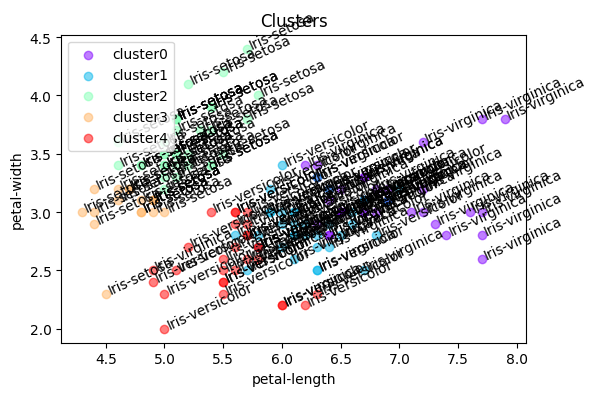

In [ ]:
n_clusters = max(agglom_c.labels_) + 1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches
plt.figure(figsize=(6, 4))

for color, label in zip(colors, cluster_labels):
  subset = df1[df1.cluster3_ == label]
  for i in subset.index:
    plt.text(subset.petal_length[i], subset.petal_width[i], str(subset['classes'][i]), rotation=25)
  plt.scatter(subset.petal_length, subset.petal_width, c=color, label='cluster'+str(label), alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('petal-length')
plt.ylabel('petal-width')

In [ ]:
df1.groupby(['cluster3_', 'classes'])['cluster3_'].count()

cluster3_  classes        
0          Iris-versicolor     1
           Iris-virginica     33
1          Iris-versicolor    22
           Iris-virginica     15
2          Iris-setosa        33
3          Iris-setosa        17
4          Iris-versicolor    27
           Iris-virginica      2
Name: cluster3_, dtype: int64

In [ ]:
agg_petal3 = df1.groupby(['cluster3_', 'classes'])['petal_length', 'petal_width', 'sepal_length', 'sepal_width'].mean()
agg_petal3

<ipython-input-63-32547e559666>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_petal3 = df1.groupby(['cluster3_', 'classes'])['petal_length', 'petal_width', 'sepal_length', 'sepal_width'].mean()


petal_length  petal_width  sepal_length  \
cluster3_ classes                                                    
0         Iris-versicolor      6.700000     3.000000      5.000000   
          Iris-virginica       6.893939     3.118182      5.806061   
1         Iris-versicolor      6.345455     2.977273      4.586364   
          Iris-virginica       6.066667     2.740000      5.100000   
2         Iris-setosa          5.172727     3.618182      1.487879   
3         Iris-setosa          4.682353     3.029412      1.417647   
4         Iris-versicolor      5.574074     2.592593      3.966667   
          Iris-virginica       5.450000     2.350000      4.750000   

                           sepal_width  
cluster3_ classes                       
0         Iris-versicolor     1.700000  
          Iris-virginica      2.133333  
1         Iris-versicolor     1.450000  
          Iris-virginica      1.846667  
2         Iris-setosa         0.275758  
3         Iris-setosa         0.182353  
4         Iris-versicolor     1.211111  
          Iris-virginica      1.600000

<ipython-input-64-72d4872021ab>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.petal_length, subset.petal_width, s=100, c=color, label='cluster'+str(label))


Text(0, 0.5, 'petal_width')

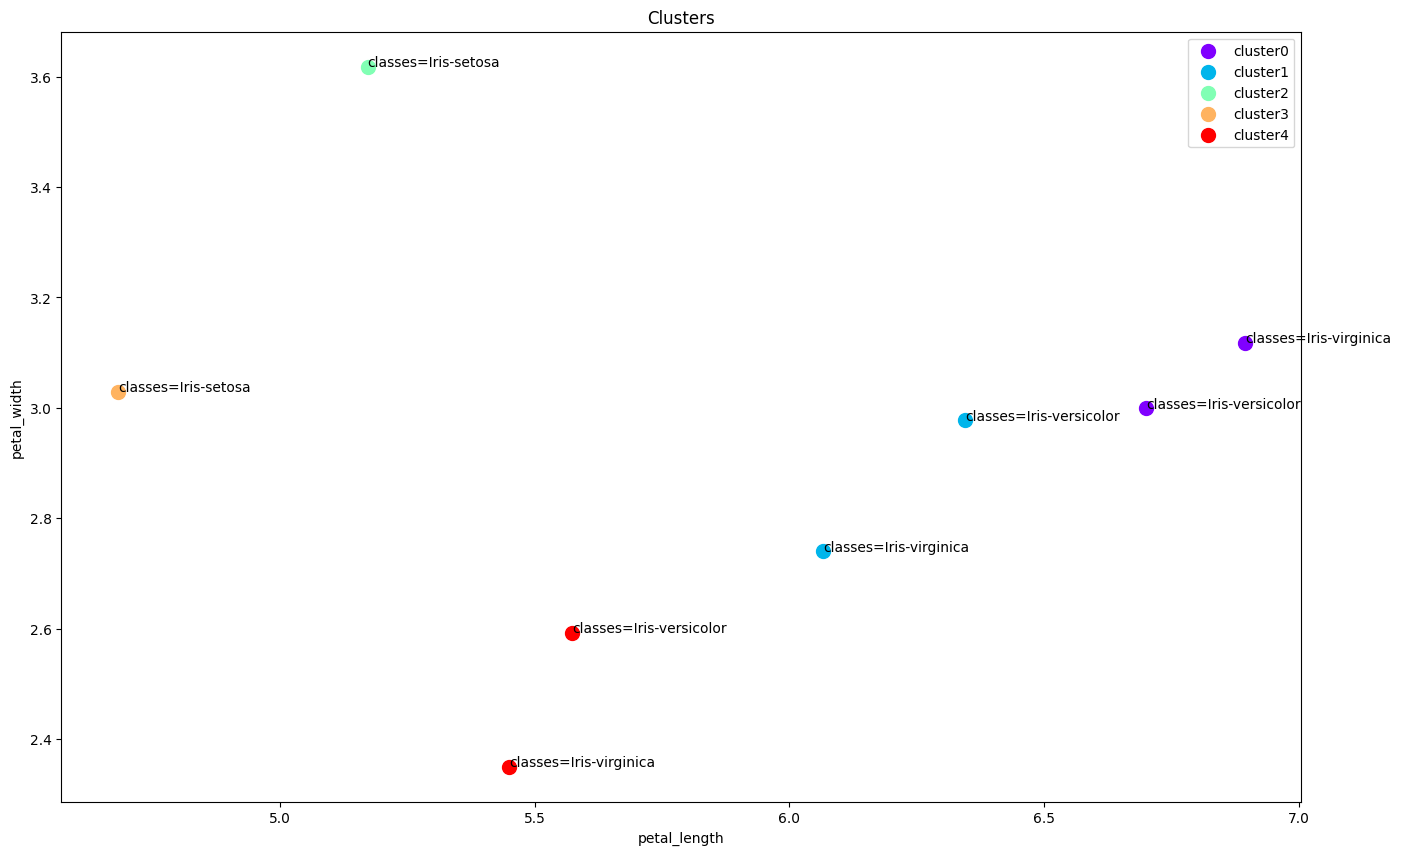

In [ ]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
  subset = agg_petal3.loc[(label,),]
  for i in subset.index:
    plt.text(subset.petal_length[i], subset.petal_width[i], 'classes='+str(i))
  plt.scatter(subset.petal_length, subset.petal_width, s=100, c=color, label='cluster'+str(label))

plt.legend()
plt.title('Clusters')
plt.xlabel('petal_length')
plt.ylabel('petal_width')

### Analisis Perbedaan Single dan Average Linkage

1. **Single Linkage:** Menggabungkan klaster berdasarkan jarak terkecil antara satu titik dari klaster pertama dan satu titik dari klaster kedua. Metode ini lebih fokus pada pasangan titik dengan jarak terdekat. Karena itulah, lebih sensitif terhadap outliers dan cenderung menciptakan struktur dendrogram dengan cabang yang panjang.

2. **Complete Linkage:** Menggabungkan klaster berdasarkan jarak terjauh antara satu titik dari klaster pertama dan satu titik dari klaster kedua. Lebih tahan terhadap outliers karena memprioritaskan pasangan titik dengan jarak terjauh. Dendrogram yang dihasilkan cenderung memiliki cabang yang lebih kompak, menciptakan efek kesatuan dalam kelompok-kelompok.

3. **Average Linkage:** Lebih tahan terhadap outliers karena melibatkan rata-rata dari semua pasangan titik. Dendrogram yang dihasilkan cenderung menunjukkan cabang yang lebih merata dan tidak terlalu panjang, menciptakan struktur yang seragam dan seimbang.

Dari struktur dendrogram yang dihasilkan, dapat disimpulkan bahwa Single Linkage cenderung menciptakan cabang dendrogram yang tidak merata, sementara Complete Linkage dapat mengatasi efek tidak merata dengan fokus pada elemen paling jauh di antara dua klaster. Average Linkage lebih berfokus pada rata-rata jarak antar-klaster, menghasilkan cabang dendrogram yang lebih merata.